# F1 optimal Lap Time

In [2]:
# Put parent folder in the pythonpath
import sys,os,inspect

import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))))
import fastest_lap
from fastest_lap import KMH

In [3]:
# Load vehicle
vehicle=fastest_lap.load_vehicle("../../../../database/limebeer-2014-f1.xml","car");

In [4]:
# Load track
track=fastest_lap.load_track("../../../../database/catalunya_discrete_1000.xml","catalunya",1.0);

In [5]:
# Compute optimal laptime
data = fastest_lap.optimal_laptime(vehicle,track,1000,["x","y","delta","throttle","u","s","time","psi","omega","v"]);
x        = data[0];
y        = data[1];
delta    = data[2];
throttle = data[3];
u        = data[4]
s        = data[5]
time     = data[6]
psi      = data[7]
omega    = data[8]
v        = data[9]

## GPS

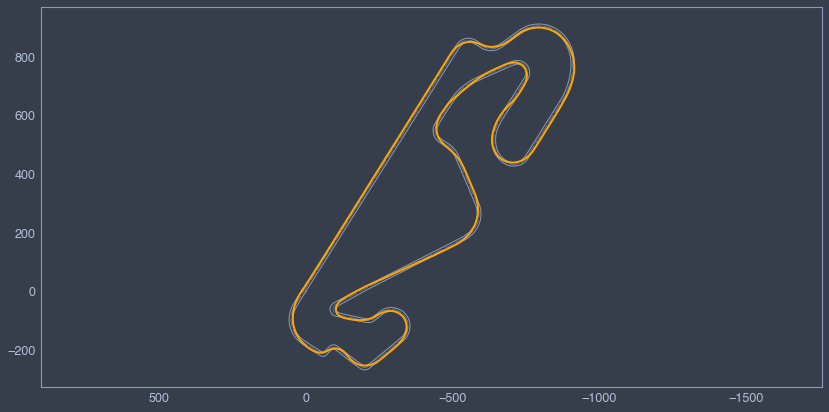

In [6]:
import numpy as np
fastest_lap.plot_optimal_laptime(np.array(x),y,track);
plt.gca().invert_xaxis()


## Steering

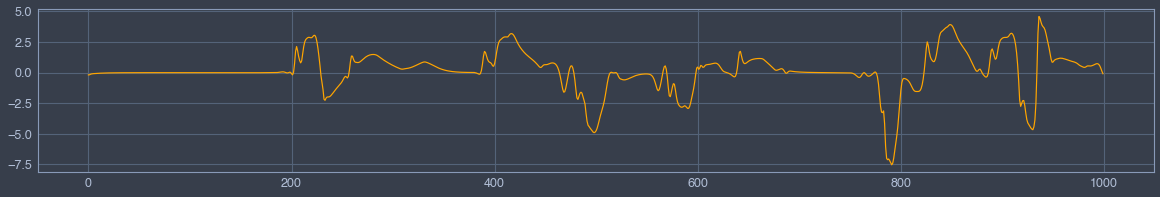

In [7]:
plt.figure(figsize=(20,3))
plt.plot(np.array(delta)*180.0/3.14,color="orange");

## Torque

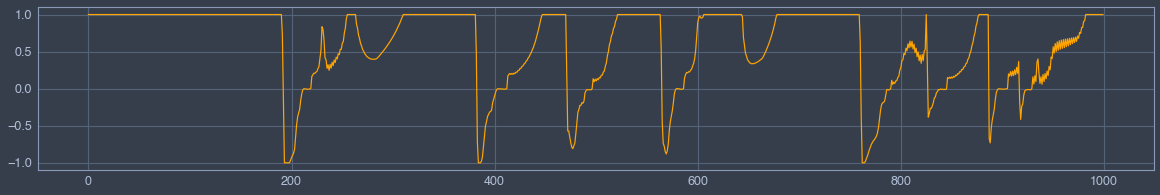

In [8]:
plt.figure(figsize=(20,3))
plt.plot(throttle,color="orange");

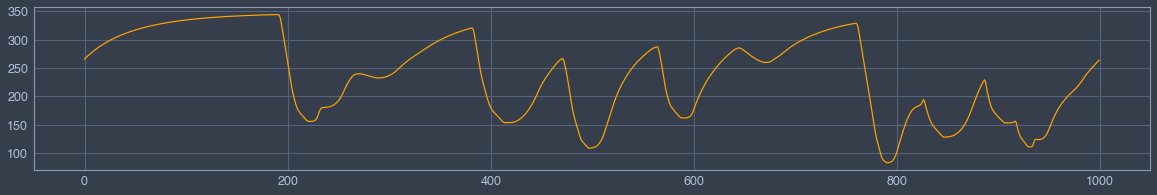

In [9]:
import numpy as np
plt.figure(figsize=(20,3))
plt.plot(np.array(u)*3.6,color="orange");

In [10]:

"""Overlaying speed traces of two laps
======================================
Compare two fastest laps by overlaying their speed traces.
"""


import matplotlib.pyplot as plt
import fastf1.plotting


fastf1.Cache.enable_cache('.')  # replace with your cache directory

# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

# load a session and its telemetry data
quali = fastf1.get_session(2020, 'Spanish Grand Prix', 'Q')
laps = quali.load_laps(with_telemetry=True)


##############################################################################
# First, we select the two laps that we want to compare

ver_lap = laps.pick_driver('VER').pick_fastest()
ham_lap = laps.pick_driver('HAM').pick_fastest()

##############################################################################
# Next we get the telemetry data for each lap. We also add a 'Distance' column
# to the telemetry dataframe as this makes it easier to compare the laps.

ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

##############################################################################
# Finally, we create a plot and plot both speed traces.
# We color the individual lines with the driver's team colors.

rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')


core           INFO 	Loading laps for Spanish Grand Prix - Qualifying [v2.1.11]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
utils          INFO 	NumExpr defaulting to 4 threads.
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '3', '18', '26', '10', '23', '6', '33', '5', '44', '55', '31', '4', '8', '11', '7', '63', '20', '16', '99']


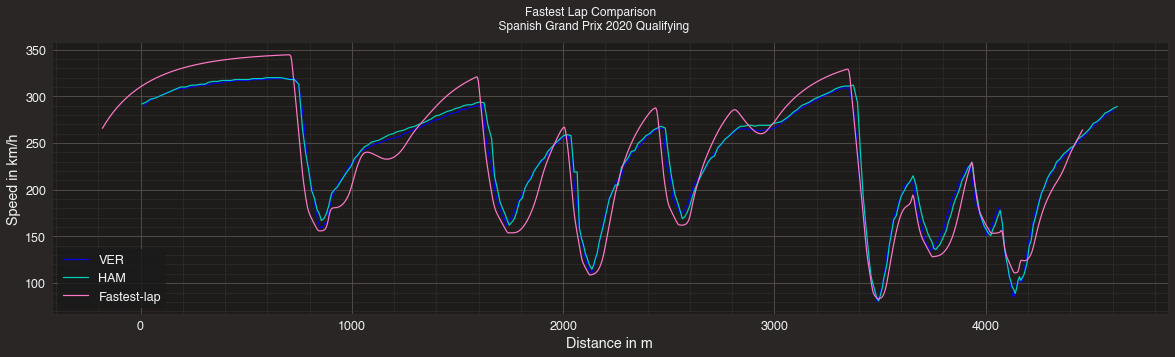

In [17]:

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='HAM')
ax.plot(np.array(s)-180.0,np.array(u)*3.6, label="Fastest-lap")
ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{quali.weekend.name} {quali.weekend.year} Qualifying")

plt.show()

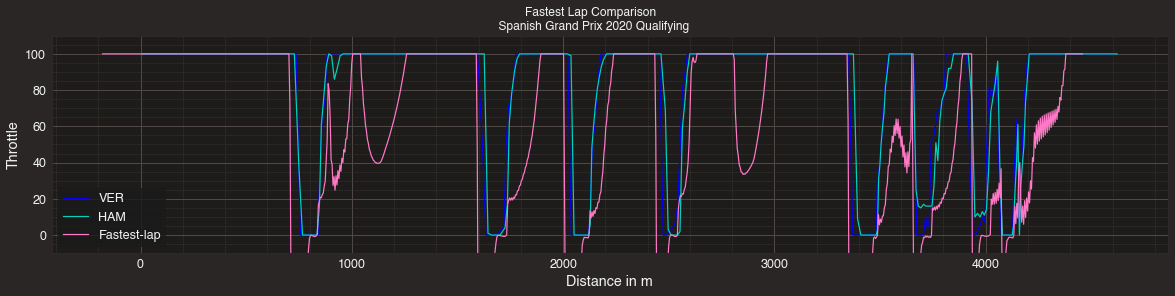

In [18]:

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(ver_tel['Distance'], ver_tel['Throttle'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Throttle'], color=mer_color, label='HAM')
ax.plot(np.array(s)-180,np.array(throttle)*100, label="Fastest-lap")
ax.set_xlabel('Distance in m')
ax.set_ylabel('Throttle')
plt.ylim((-10,110))

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{quali.weekend.name} {quali.weekend.year} Qualifying")

plt.show()

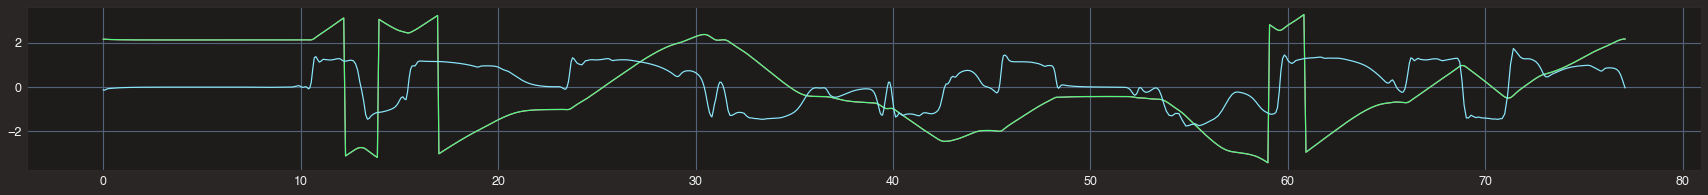

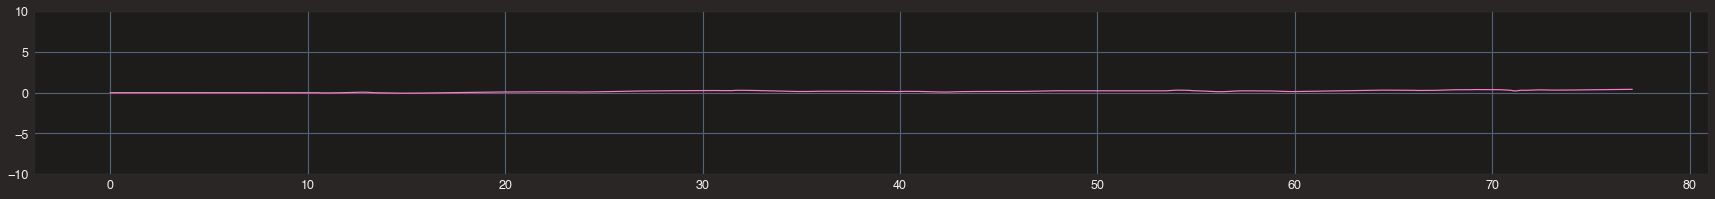

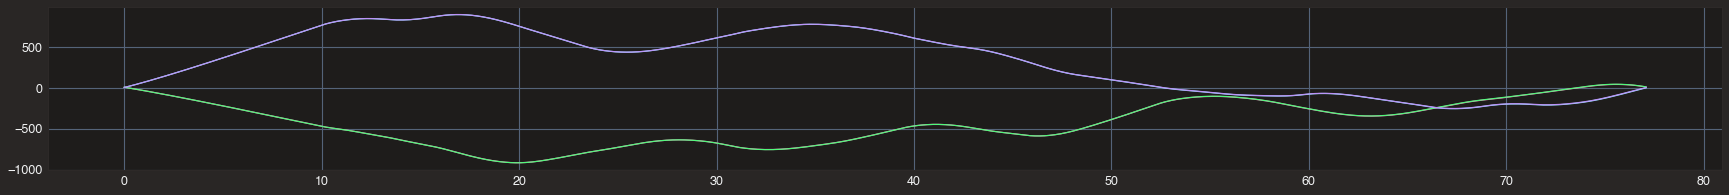

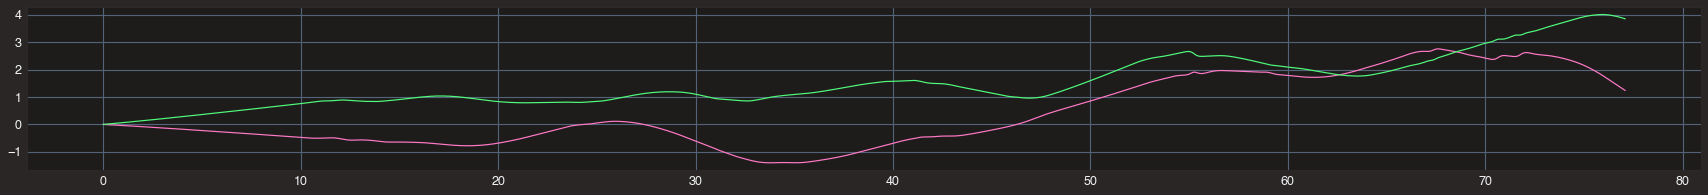

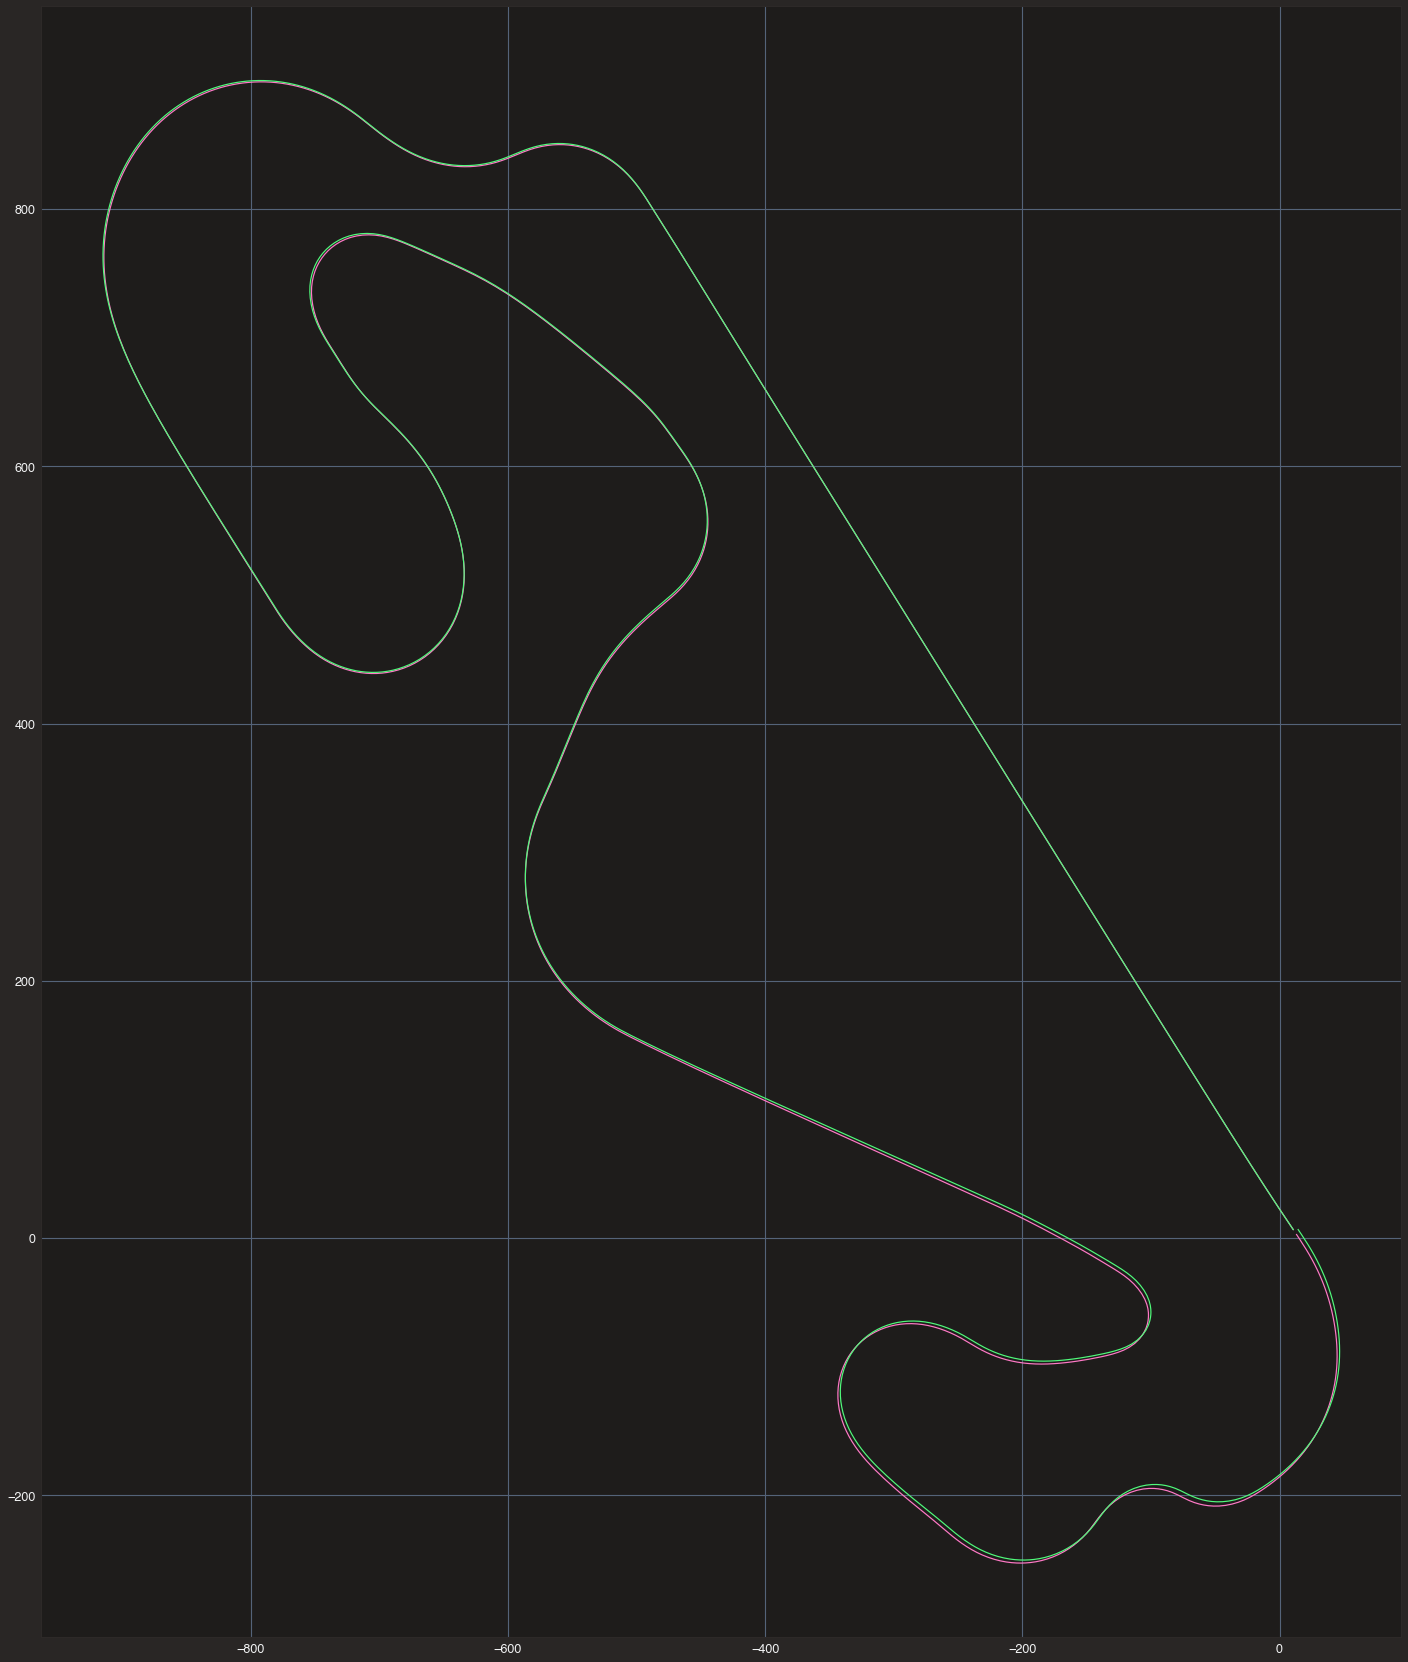

In [20]:
import numpy as np
from math import fabs, pi, sin, cos


psi_computed = np.zeros(len(psi))
psi_computed[0] = psi[0]
x_computed = np.zeros(len(x))
x_computed[0] = x[0]
y_computed = np.zeros(len(x))
y_computed[0] = y[0]
for i in range(1,len(time)):
    psi_computed[i] = psi_computed[i-1] + 0.5*(omega[i]+omega[i-1])*(time[i]-time[i-1])
    x_computed[i] = x_computed[i-1] + 0.5*(u[i]*cos(psi_computed[i])+u[i-1]*cos(psi_computed[i-1])-v[i]*sin(psi_computed[i])-v[i-1]*sin(psi_computed[i-1]))*(time[i]-time[i-1])
    y_computed[i] = y_computed[i-1] + 0.5*(u[i]*sin(psi_computed[i])+u[i-1]*sin(psi_computed[i-1])+v[i]*cos(psi_computed[i])+v[i-1]*cos(psi_computed[i-1]))*(time[i]-time[i-1])
    
for i in range(len(psi)):
    if ( psi_computed[i] > psi[i] + 1.8*np.pi):
        psi_computed[i] = psi_computed[i] - 2.0*np.pi;

plt.figure(figsize=(30,3));
plt.plot(time,psi);
plt.plot(time,psi_computed);
plt.plot(time,2.0*np.array(omega));
plt.show()
plt.figure(figsize=(30,3));
plt.plot(time,(np.array(psi_computed)-np.array(psi))*180.0/3.14);
plt.ylim(-10,10);
plt.figure(figsize=(30,3));
plt.plot(time,x);
plt.plot(time,x_computed)
plt.plot(time,y);
plt.plot(time,y_computed)
plt.figure(figsize=(30,3));
plt.plot(time,np.array(x_computed)-np.array(x))
plt.plot(time,np.array(y_computed)-np.array(y))
plt.figure(figsize=(30,30))
plt.plot(x,y)
plt.plot(x_computed,y_computed)
plt.gca().set_aspect('equal')